In [ ]:
# installare (se necessario) e importare GeoPandas

In [ ]:
!pip install geopandas 
import geopandas 

     |████████████████████████████████| 1.0 MB 4.6 MB/s 
     |████████████████████████████████| 6.3 MB 40.8 MB/s 
     |████████████████████████████████| 15.4 MB 30.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [ ]:
bike_ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_ciclabili/bike_ciclabili.dbf')
bike_ciclabili

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064,PIAZZA VENTICINQUE APRILE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (9.18700 45.48095, 9.18696 45.48085..."
1,9002,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (9.24192 45.43931, 9.24202 45.43939..."
2,9003,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (9.23979 45.43996, 9.23991 45.43998..."
3,9004,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,6.0,"LINESTRING (9.23902 45.44251, 9.23898 45.44256)"
4,9005,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,28.0,"LINESTRING (9.23990 45.43999, 9.23985 45.44009..."
...,...,...,...,...,...,...,...,...,...,...,...
3160,12932,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,4.0,"LINESTRING (9.14977 45.46021, 9.14979 45.46024)"
3161,12933,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,10.0,"LINESTRING (9.14966 45.46050, 9.14972 45.46057)"
3162,12934,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,5.0,"LINESTRING (9.14963 45.46046, 9.14966 45.46050)"
3163,12935,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,9.0,"LINESTRING (9.14957 45.46039, 9.14963 45.46046)"


In [ ]:
# visualizzaere il geodataset delel piste ciclabili

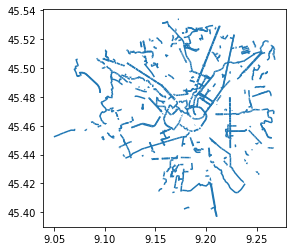

In [ ]:
bike_ciclabili.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [ ]:
milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm (1)/NIL_WM.dbf')
milano

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

In [ ]:
!pip install contextily
import contextily as ctx 

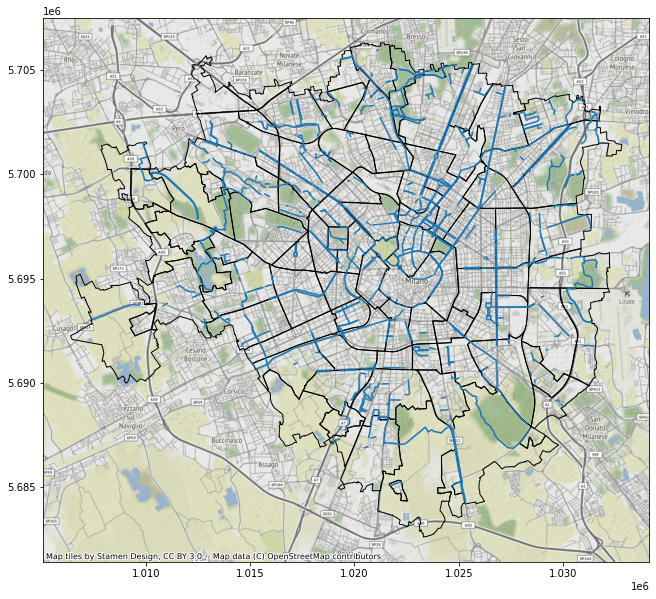

In [ ]:
ax = milano.to_crs(epsg=3857).plot(facecolor='none',edgecolor='k',figsize=(15,10))
bike_ciclabili.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)

In [ ]:
# calcolare la dimensione media dell'area dei quartieri di Milano
milano['Shape_Area'].mean()

2065439.3298521973

In [ ]:
# visualizzare i nomi dei quartieri più grandi della media
q = milano[milano['Shape_Area'] > milano['Shape_Area'].mean()]['NIL']
q

0        RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO
7                     QUARTO OGGIARO - VIALBA - MUSOCCO
10                                   STADIO - IPPODROMI
12                                                DUOMO
27                  VILLAPIZZONE - CAGNOLA - BOLDINASCO
28                                PARCO BOSCO IN CITTA'
29                                     GORLA - PRECOTTO
30    NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...
33                TALIEDO - MORSENCHIO - Q.RE FORLANINI
36                                              ASSIANO
41                                      LODI - CORVETTO
47    Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO
48                               MONLUE' - PONTE LAMBRO
50         GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE
52                                         FORZE ARMATE
55                                  PARCO DELLE ABBAZIE
57                                           BANDE NERE
58                                    LAMBRATE -

In [ ]:
# visualizzare i quartieri più grandi della media sulla mappa di Milano

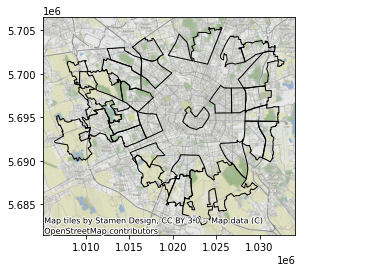

In [ ]:
ax = milano[milano['Shape_Area'] > milano['Shape_Area'].mean()].to_crs(epsg=3857).plot(facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
# visualizzare una mappa con la legenda in modo che i quartieri più grandi abbiano colori diversi rispetto ai quartieri più piccoli. 
# La scala dei colori deve essere rossa e si deve riuscire ad intravedere in trasparenza la mappa sottostante

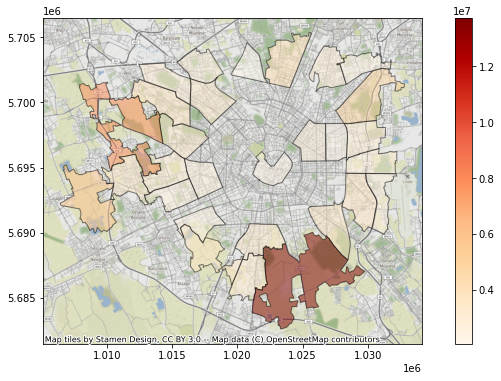

In [ ]:
ax = milano[milano['Shape_Area'] > milano['Shape_Area'].mean()].to_crs(epsg=3857).plot(column='Shape_Area',alpha=0.5,figsize=(12, 6),legend=True,edgecolor='k',cmap='OrRd')
ctx.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Greco, prendendole dal geodataframe dei quartieri

In [ ]:
greco = milano.loc[milano['NIL'].str.contains('GRECO')]
greco

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
17,13,GRECO - SEGNANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7468.531297,1.768603e+06,106,"POLYGON ((9.21220 45.50971, 9.21224 45.50922, ..."


In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Greco

In [ ]:
bike_ciclabili[bike_ciclabili.intersects(greco.geometry.squeeze())]

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
171,9210,1414,VIA TOFANE,None,urbana,"percorso promiscuo - pedonale, ciclabile e vei...",sottopasso,bidirezionale,FACILITAZIONE - divieto di transito ecc. bici,15.0,"LINESTRING (9.21681 45.50016, 9.21689 45.50028)"
241,9287,1418,VIA EMILIO DE MARCHI,None,ciclabile,corsia ciclabile - sede propria,ponte,bidirezionale,corsia ciclabile,133.0,"LINESTRING (9.21201 45.50447, 9.21203 45.50449..."
308,9357,1108,VIA MELCHIORRE GIOIA,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,corsia ciclabile,183.0,"LINESTRING (9.20824 45.49692, 9.20805 45.49627..."
369,9418,1427,VIALE SARCA,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,corsia ciclabile,29.0,"LINESTRING (9.20618 45.51083, 9.20615 45.51082..."
381,9430,1761,VIA GUIDO VENOSTA,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,corsia ciclabile,232.0,"LINESTRING (9.20897 45.50866, 9.20859 45.50909..."
442,9491,1418,VIA EMILIO DE MARCHI,None,ciclabile,corsia ciclabile - sede propria,ponte,bidirezionale,corsia ciclabile,28.0,"LINESTRING (9.21101 45.50650, 9.21098 45.50653..."
444,9493,1436,VIA ROBERTO COZZI,None,ciclabile,corsia ciclabile - segnaletica,marciapiede,bidirezionale,corsia ciclabile,49.0,"LINESTRING (9.20964 45.50902, 9.20954 45.50896..."
445,9494,1436,VIA ROBERTO COZZI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile con lanterna bici,17.0,"LINESTRING (9.20899 45.50861, 9.20912 45.50849)"
466,9515,1761,VIA GUIDO VENOSTA,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,corsia ciclabile,117.0,"LINESTRING (9.20756 45.51044, 9.20752 45.51047..."
712,9759,1413,VIA TIRANO,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,percorso promiscuo - pedonale e ciclabile,44.0,"LINESTRING (9.21180 45.49806, 9.21199 45.49812..."


In [ ]:
# visualizzare su una mappa il quartiere di Greco e le piste ciclabili che lo attraversano
# evidenziare bene in nero le piste ciclabili 

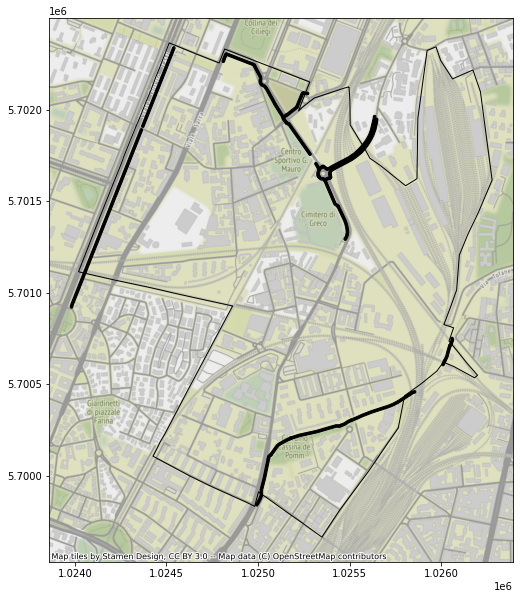

In [ ]:
ax = bike_ciclabili[bike_ciclabili.intersects(greco.geometry.squeeze())].to_crs(epsg=3857).buffer(7).plot(facecolor='k',edgecolor='k',figsize=(15,10))
greco.to_crs(epsg=3857).plot(ax=ax, facecolor='none', edgecolor='k')
ctx.add_basemap(ax)